# Analyzing Video "Red Right Hand" with OpenCV and NumPy

**Task 1: Import libraries**

In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

VFILE = "Nick_Cave&The_Bad_Seeds.mp4"

**Task 1: Define generator for reading video**

In [3]:
def get_frames (filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
             break
    video.release()
    yield None

**Task 2: Retrieve and display video frames**

In [4]:
for f in get_frames(VFILE):
    if f is None:
        break
        cv2.imshow('frame', f)
        if cv2.waitKey(10) == 27:
            break
cv2.destroyAllWindows()

**Task 2: Define function to get a single video frame**

In [5]:
def get_frame (filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
             break
    video.release()
    return None

**Task 2: Examining pixels**

In [6]:
frame = get_frame(VFILE, 80)
print('shape ', frame.shape)
print('pixel at (0,0)', frame[0,0,:])

shape  (360, 480, 3)
pixel at (0,0) [0 0 0]


**Task 2: Displaying a video frame**

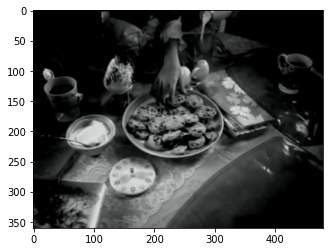

In [7]:
plt.imshow(frame)

**Task 3: Fixing color convention**

pixel at (0,0)  [0 0 0]


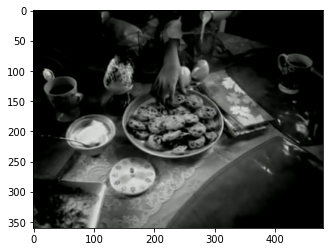

In [8]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print('pixel at (0,0) ', fix_frame[0,0,:])
plt.imshow(fix_frame)

**Task 3: Cropping a video frame**

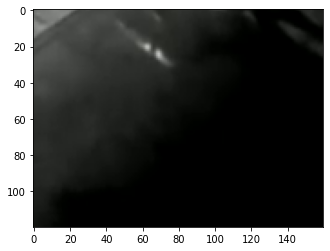

In [9]:
plt.imshow(fix_frame[240:400, 320:640])

**Task 3: Adjusting Brightness**

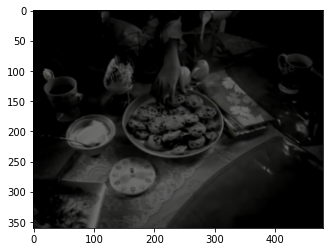

In [10]:
darker = 0.5 * fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker)

**Task 4: Drawing a circle**

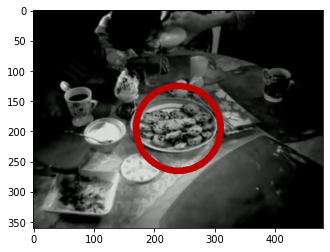

In [31]:
frame = get_frame(VFILE, 200)
cv2.circle(frame,
          center = (240,195),
          radius = 70,
          color = (0,0,189),
          thickness = 10)
fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

**Task 4: Processing an entire video**

In [43]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,
                text=str(counter),
                org=(100,100),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,
                color=(0,255,0),
                thickness=3)
    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:
        break
    counter += 1
cv2.destroyAllWindows()

**Task 5: Finding the total frame count**

In [50]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('frame count:', count)

frame count: 7135


**Task 6: Creating a collage**

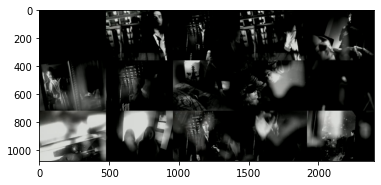

In [66]:
skip_frames = count // 15

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1
    
row1 = np.concatenate(frames[0:5], axis = 1)
row2 = np.concatenate(frames[5:10], axis = 1)
row3 = np.concatenate(frames[10:15], axis = 1)
collage = np.concatenate((row1, row2, row3), axis=0)
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.imshow(collage)